In [3]:
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression


1(a) - Test for normality of residuals
1(b) - checking the accuracy of the model
- Fitting of SLR and MLR (regression), testing of hypothesis and Confidence interval 
- Detection and treatment of outliers
- multicollinearity
- fitting of non linear regression model

Important topics for regression LAB FAT

## Fitting of SLR 

In [11]:
df = pd.read_excel('Sales_data.xlsx')
df

,S. N,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [122]:
df = sm.add_constant(df)
model_tv = sm.OLS(df['Sales'], df[['const','TV']]).fit() #Single variable
print(model_tv.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     30.82
Date:                Wed, 01 May 2024   Prob (F-statistic):           7.14e-05
Time:                        22:59:10   Log-Likelihood:                -39.724
No. Observations:                  16   AIC:                             83.45
Df Residuals:                      14   BIC:                             84.99
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8154      1.348      5.054      0.0

C:\Users\kings\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [123]:
print(f"Sales = {model_tv.params[0]} + {model_tv.params[1]}*TV")

Sales = 6.815427538794577 + 0.053860565437674715*TV


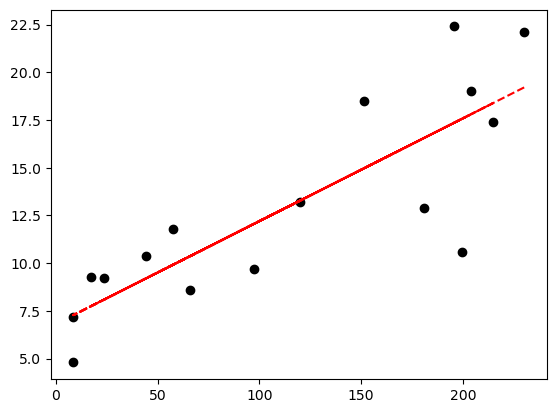

In [127]:
#fitting for TV
plt.scatter(df['TV'], df['Sales'], color='Black')
plt.plot(df['TV'],model_tv.fittedvalues, '--r' )
plt.show()

### Testing of hypothesis and Confidence interval 

## EXP2. 
### Residual analysis and forecast accuracy for a given data set.

In [46]:
d2 = pd.read_excel('House_data.xlsx')
d2 = sm.add_constant(d2)
d2

,const,Area,Bedrooms,Age,Price
0,1.0,2600,3,20,550000
1,1.0,3000,4,15,565000
2,1.0,3200,3,18,610000
3,1.0,3600,3,30,595000
4,1.0,4000,5,8,760000
5,1.0,4100,6,8,810000


##### Single Variable


In [73]:

model = sm.OLS(d2['Price'], d2[['const', 'Area']]).fit()#define the model

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     17.35
Date:                Wed, 01 May 2024   Prob (F-statistic):             0.0141
Time:                        20:28:39   Log-Likelihood:                -72.543
No. Observations:                   6   AIC:                             149.1
Df Residuals:                       4   BIC:                             148.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.669e+04   1.39e+05      0.552      0.6

C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [74]:
d2['Residuals'] = model.resid #Residual values
d2

,const,Area,Bedrooms,Age,Price,Residuals
0,1.0,2600,3,20,550000,38302.796528
1,1.0,3000,4,15,565000,-13621.022179
2,1.0,3200,3,18,610000,-2082.931533
3,1.0,3600,3,30,595000,-84006.750241
4,1.0,4000,5,8,760000,14069.431051
5,1.0,4100,6,8,810000,47338.476374


Residual Plot

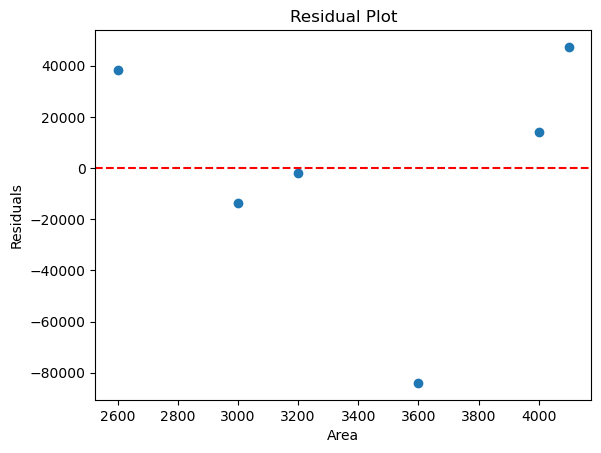

In [81]:
plt.scatter(d2['Area'], d2['Residuals'])
plt.axhline(y=0, color= 'red', linestyle= '--')
plt.title('Residual Plot')
plt.xlabel('Area')
plt.ylabel('Residuals')
plt.show()

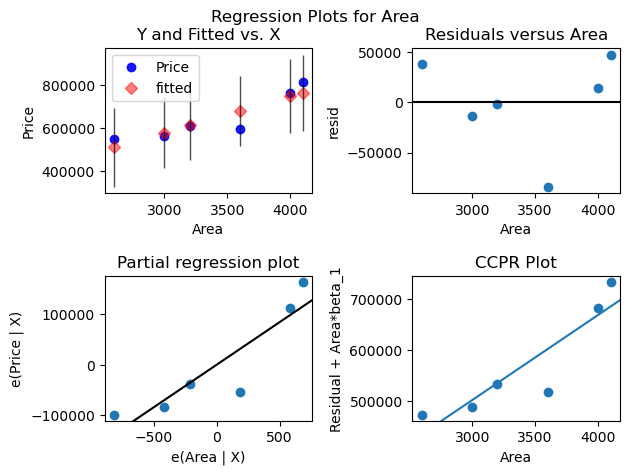

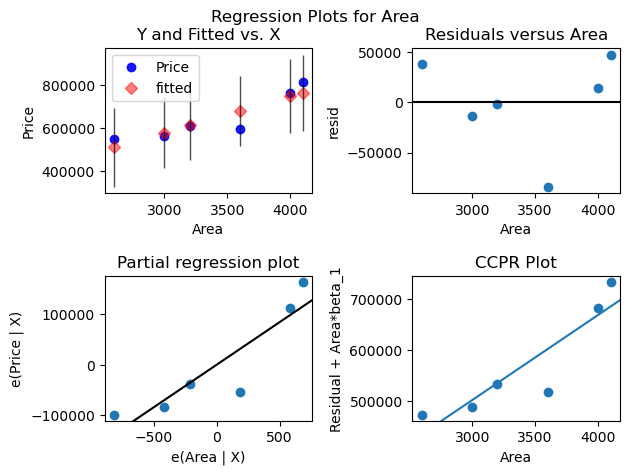

In [86]:
sm.graphics.plot_regress_exog(model,'Area')

###### Multiple Variable


In [72]:
model_mul = sm.OLS(d2['Price'], d2[['Area', 'Bedrooms', 'Age']]).fit()

print(model_mul.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              386.7
Date:                Wed, 01 May 2024   Prob (F-statistic):                    0.000222
Time:                        20:28:08   Log-Likelihood:                         -70.996
No. Observations:                   6   AIC:                                      148.0
Df Residuals:                       3   BIC:                                      147.4
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


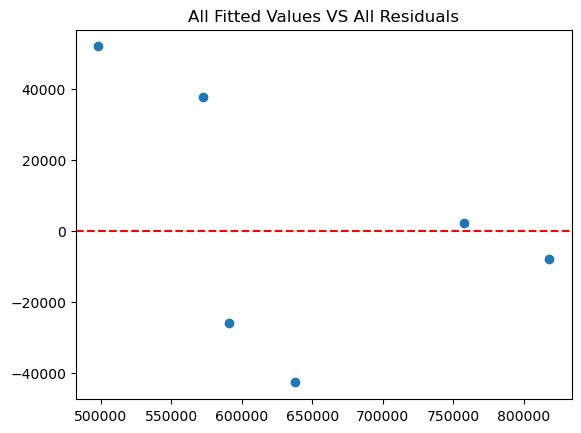

In [94]:

plt.scatter(model_mul.fittedvalues, model_mul.resid)
plt.axhline(y=0, color='Red', linestyle= '--')
plt.title('All Fitted Values VS All Residuals')
plt.show()

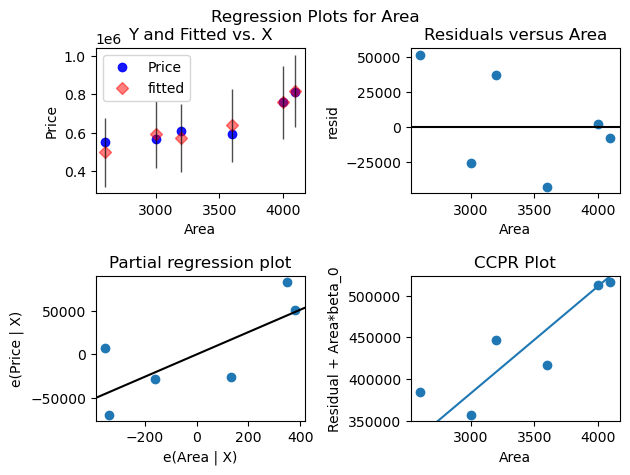

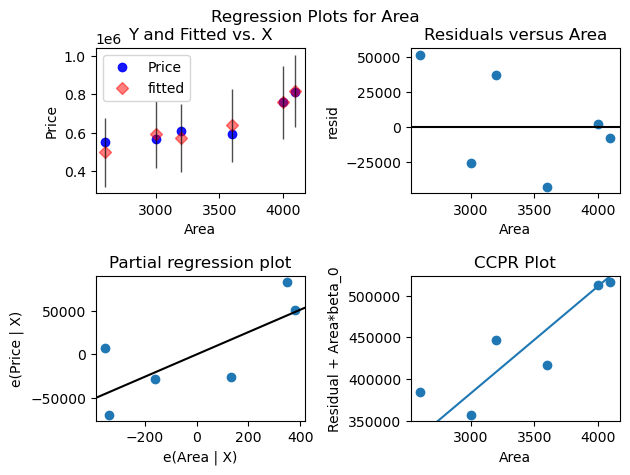

In [91]:
sm.graphics.plot_regress_exog(model_mul,'Area')

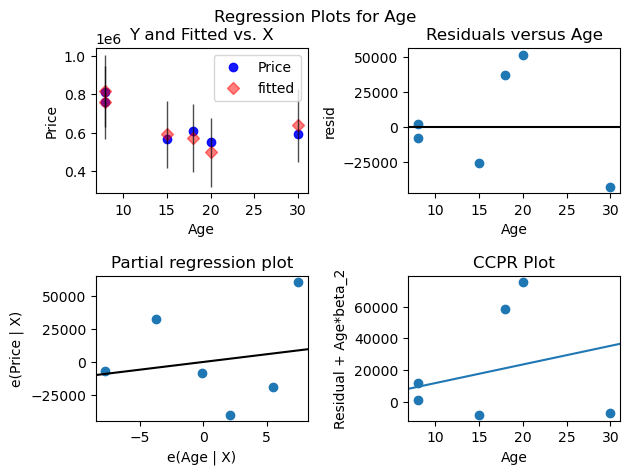

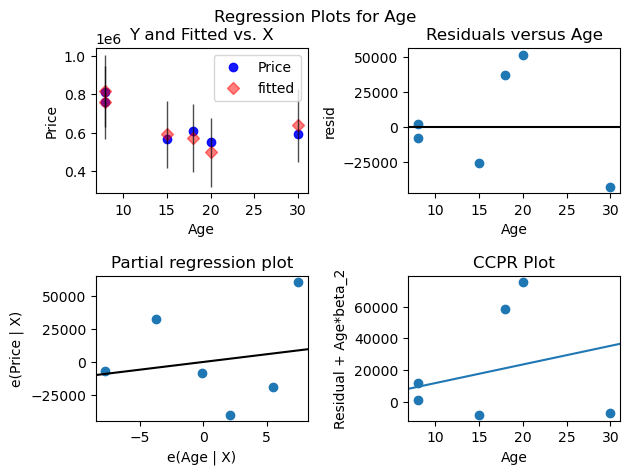

In [92]:
sm.graphics.plot_regress_exog(model_mul,'Age')

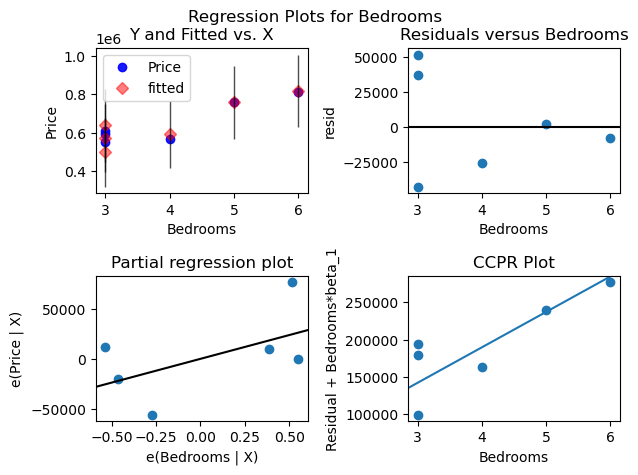

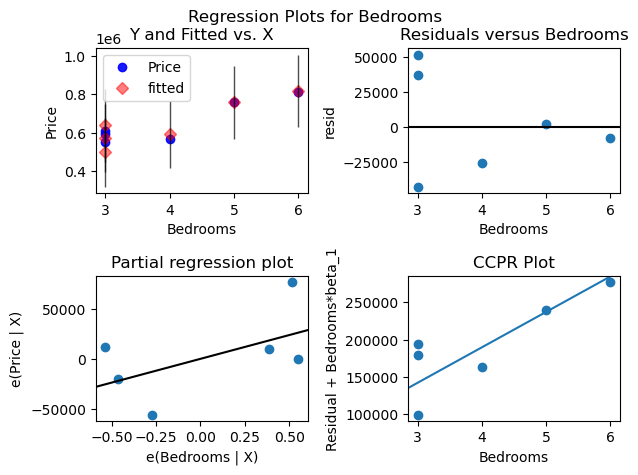

In [93]:
sm.graphics.plot_regress_exog(model_mul,'Bedrooms')

## EXP3. 
### Validating Simple linear regression using t, F and p- test. 

4. Developing confidence interval and testing the model simple and multiple regression.

5. Multiple regression: estimation of parameters, fitting of the model, error analysis, model validation, variable selection and testing.

6. Problem of multicollinearity and, determination of VIF. 

7. Diagnostic measures and outliers detection, Durbin Watson test,  variable selection and model building 

8.  Fitting of nonlinear regression model.

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
y= df['Sales']
TV = df[['TV']]
Radio = df[['Radio']]
Newspaper = df[['Newspaper']]

In [19]:
model = LinearRegression()
model.fit(TV, y) # fitting of model
print ('Alpha/ Intercept: ',model.intercept_, '\nBeta/ Slope: ', model.coef_[0])

Alpha/ Intercept:  6.815427538794575 
Beta/ Slope:  0.0538605654376747


In [34]:
pred = model.predict(TV)
pred

array([19.20874365,  9.2122227 ,  7.74182926, 14.9753032 , 16.55341777,
        7.28401446,  9.91241005, 13.2894675 ,  7.2786284 , 17.57676851,
       10.37561091, 18.37929094,  8.097309  , 12.06683267, 17.80836894,
       17.33978203])

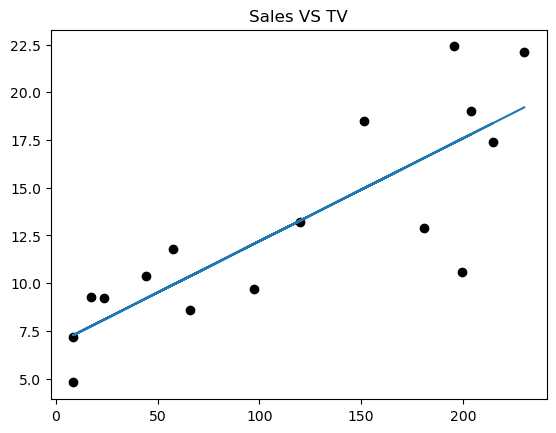

In [39]:
plt.scatter(TV, y, color= 'Black')
plt.plot(TV, pred)
plt.title(label= 'Sales VS TV')
plt.show()

### checking the accuracy of the model

In [40]:
# R2 
r2 = r2_score(y, pred)
print("R_Square: ", r2)

R_Square:  0.6876241989696272


In [44]:
# Adjusted R-square
n = len(y)
p = TV.shape[1]
adj_r2 = 1- (((1- r2) *(n-1))/(n - p - 1))
print("Adjusted R-Square: ", adj_r2)

Adjusted R-Square:  0.665311641753172


## Y = 6.81 + 0.053*TV
#### Model Interpretation:
- Here the model reveals that one unit increase in TV will increase avg sales by 0.053, but when the TV is constant there will be an avg increase of 6.81 in sales. 